In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 1

In [174]:
def heatmap(name, path):
    data = pd.read_csv(path, sep='\t')
    data = data[['V_hit', 'J_hit']]
    data.J_hit = data.J_hit.str[:-3]
    data.V_hit = data.V_hit.str[:-3]
    data = data.groupby(['V_hit', 'J_hit']).size().unstack('J_hit', fill_value=0)
    data['sum'] = data.sum(axis=1)
    sorted_index = data['sum'].sort_values(ascending=False).index
    plot(data, name, sorted_index)
    return data

In [217]:
def plot(data, name, sorted_index):
    title = name.capitalize()
    plt.figure(figsize=(8, 20))
    sns_plot = sns.heatmap(data.loc[sorted_index], annot=True, fmt="d")
    sns_plot.set(xlabel='J gene', ylabel='V gene')
    plt.title(title)
    sns_plot.figure.savefig(f"{name}_heatmap.png")

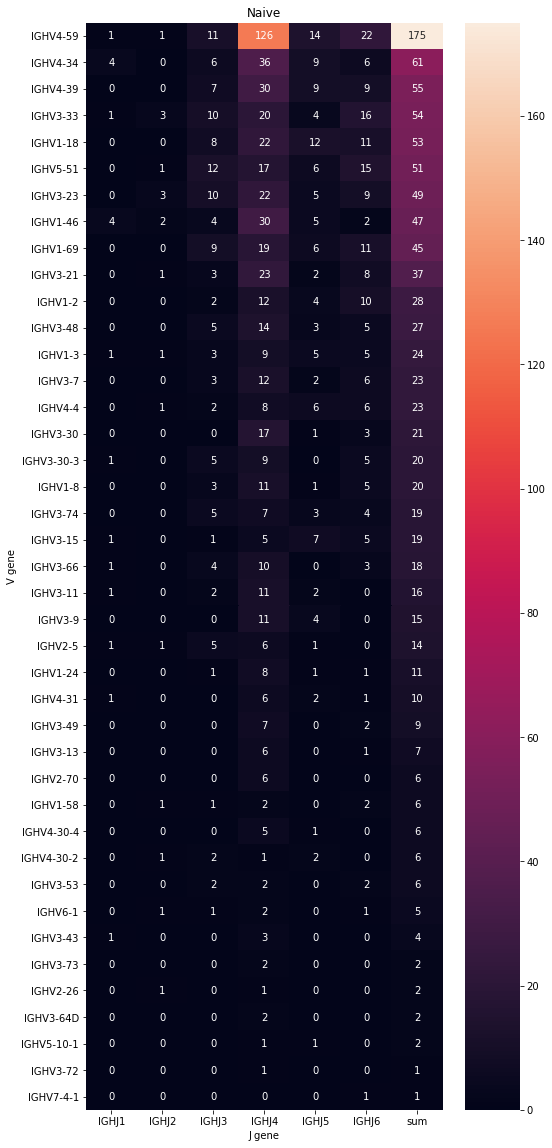

In [220]:
plasma = heatmap('naive', 'naive/cdr_details_naive.txt')

# 2

In [149]:
def boxplot(name):
    path = name
    data = pd.read_csv(os.path.join(path, f'nice_data_{name}.csv'))
    data_grouped = data.groupby(['Read_name', 'Gene_name']).Is_synonymous.count().sort_values(ascending=False).reset_index()
    data_grouped.Gene_name = data_grouped.Gene_name.str[:-3]
    data.Gene_name = data.Gene_name.str[:-3]
    
    data_grouped_2 = data.groupby(['Gene_name']).Is_synonymous.count().sort_values(ascending=False).reset_index()
    index = data_grouped_2.Gene_name.head(10).values
    
    plt.figure(figsize=(11, 5))
    sns_plot = sns.boxplot(x="Gene_name", y="Is_synonymous", 
                           data=data_grouped.loc[data_grouped.Gene_name.isin(index)], palette='magma')
    sns_plot.set(xlabel='V gene', ylabel='Distance')
    plt.title(name.capitalize())
    plt.savefig(f'{name}_boxplot.png')

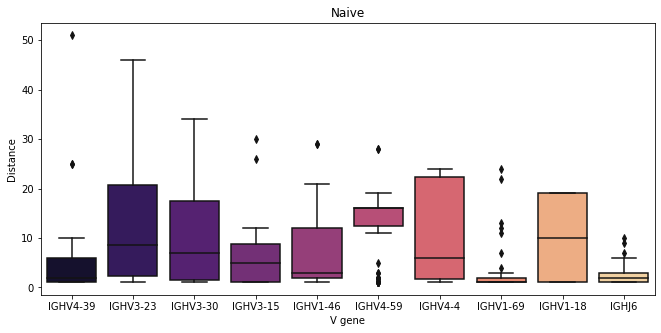

In [152]:
boxplot('naive')

# 3

In [208]:
def cdr3_distribution(name, kde=True):
    data = pd.read_csv(f'{name}/cdr_details_{name}.txt', sep='\t')
    data.V_hit = data.V_hit.str[:-3]
    data['CDR3_len'] = data['CDR3_end'] - data['CDR3_start']
    sns_plot = sns.distplot(data['CDR3_len'], kde=kde)
    sns_plot.set_xlabel('CDR3 length')
    sns_plot.set_ylabel('Count')
    plt.title(name.capitalize())
    plt.savefig(f'{name}_cdr3_distribution.png')
    data['type'] = name.capitalize()
    return data[['CDR3_len', 'type']]

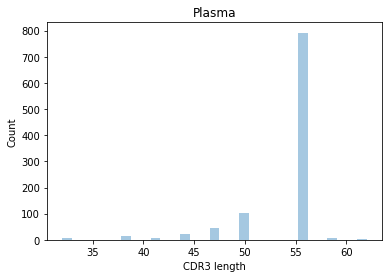

In [199]:
plasma_cdr3 = cdr3_distribution('plasma', kde=False)

# 2.1

In [193]:
(naive.drop('sum', axis=1) != 0).sum().sum()

148

In [194]:
(memory.drop('sum', axis=1) != 0).sum().sum()

180

In [195]:
(plasma.drop('sum', axis=1) != 0).sum().sum()

32

# 2.2

In [203]:
memory_cdr3['type'] = 'Memory'

In [209]:
cdr3_lengths = pd.concat([memory_cdr3, naive_cdr3, plasma_cdr3], ignore_index=True)

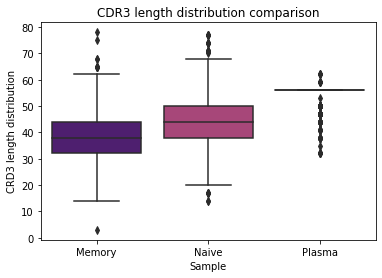

In [216]:
sns_plot = sns.boxplot(data=cdr3_lengths, x='type', y='CDR3_len', palette='magma')
sns_plot.set_ylabel('CRD3 length distribution')
sns_plot.set_xlabel('Sample')
sns_plot.set_title('CDR3 length distribution comparison')
plt.savefig('cdr3_dist_comparison.png')